# 프로그래밍 실습

## 1장

### 1.1 정수를 입력받아서 합을 계산하는 함수 `calc`를 작성하라.

In [1]:
def calc(n):
    sum = 0
    for i in range(0, n+1):
        sum += i
    return sum

In [2]:
calc(10)

55

### 1.2 다음과 같은 행렬 `A` 와 벡터 `v`를 파이썬으로 정의하고, 이를 출력하는 프로그램을 작성하라.

In [3]:
import numpy as np

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
v = np.array([[1], [2], [3]])

print(f"A = {A}")
print(f"v = {v}")

A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
v = [[1]
 [2]
 [3]]


### 1.3 다음과 같은 행렬과 벡터들의 크기를 출력하는 프로그램을 작성하라.

$$
A = 
\begin{matrix}
\left[\begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array}\right]
\end{matrix}
,
v = 
\begin{matrix}
\left[\begin{array}{c} 1 \\ 2 \\ 3 \end{array}\right]
\end{matrix}
,
w = \begin{matrix}
\left[\begin{array}{c} 1 & 2 & 3 \end{array}\right]
\end{matrix}
,
B = 
\begin{matrix}
\left[\begin{array}{cc} 1 & 2 & 3\\ 4 & 5 & 6 \end{array}\right]
\end{matrix}
$$

In [4]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f"A = {A}")
print(f"A.shape = {A.shape}")

v = np.array([[1], [2], [3]])
print(f"v = {v}")
print(f"v.shape = {v.shape}")

w = np.array([1, 2, 3])
print(f"w = {w}")
print(f"w.shape = {w.shape}")

B = np.array([[1,2,3], [4,5,6]])
print(f"B = {B}")
print(f"B.shape = {B.shape}")

A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
A.shape = (3, 3)
v = [[1]
 [2]
 [3]]
v.shape = (3, 1)
w = [1 2 3]
w.shape = (3,)
B = [[1 2 3]
 [4 5 6]]
B.shape = (2, 3)


## 2장

### 2.1 $2 \times 3$ 영행렬, 모든 성분이 1인 $2 \times 2$ 행렬, 모든 성분이 3인 $3 \times 2$ 행렬, $2 \times 2$ 단위행렬을 만들어 출력하는 프로그램을 작성하라.

In [5]:
a = np.zeros((2,3))
print(f"a = {a}")

b = np.ones((2,2))
print(f"b = {b}")

c = np.full((3,2),3)
print(f"c = {c}")

d = np.eye(2)
print(f"d = {d}")

a = [[0. 0. 0.]
 [0. 0. 0.]]
b = [[1. 1.]
 [1. 1.]]
c = [[3 3]
 [3 3]
 [3 3]]
d = [[1. 0.]
 [0. 1.]]


### 2.2 가우스-조단 소거법을 수행하는 gauss( )라는 함수를 정의하고, 이 함수를 이용하여 다음 연립선형방정식의 해를 구하라. gauss(A)의 입력으로 주어지는 A는 주어진 연립선형방정 식에 대한 첨가행렬이다.

$$
\begin{matrix}
2x_1 + 2x_2 + 4x_3 & = & 18 \\
x_1 + 3x_2 + 2x_3 & = & 13 \\
3x_1 + x_2 + 3x_3 & = & 14 \\
\end{matrix}
$$

In [6]:
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
            if j == n-1:
                line += "| "
        print(line)
    print("")

In [7]:
def gauss(A):
    (n,m) = A.shape

    for i in range(0, min(n,m)):
        # i번째 열에서 절댓값이 최대인 성분의 행 선택
        maxEl = abs(A[i,i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k,i]) > maxEl:
                maxEl = abs(A[k,i])
                maxRow = k

        # 현재 i번째 행과 최댓값을 갖는 행 maxRow의 교환
        for k in range(i, m):
            tmp = A[maxRow,k]
            A[maxRow,k] = A[i,k]
            A[i,k] = tmp

        # 추축성분을 1로 만들기
        piv = A[i,i]
        for k in range(i, m):
            A[i,k] = A[i,k]/piv

        # 현재 i번째 열의 i번째 행을 제외한 모두 성분을 0으로 만들기
        for k in range(0, n):
            if k != i:
                c = A[k,i]/A[i,i]
                for j in range(i, m):
                    if i == j:
                        A[k,j] = 0
                    else:
                        A[k,j] = A[k,j] - c * A[i,j]

        pprint(str(i+1)+"번째 반복", A) # 중간 과정 출력

    # Ax=b의 해 반환
    x = np.zeros(m-1)
    for i in range(0,m-1):
        x[i] = A[i,m-1]
    return x

# 주어진 연립선형방정식에 대한 첨가행렬
A = np.array([[2., 2., 4., 18.], [1., 3., 2., 13.], [3., 1., 3., 14.]])

pprint("주어진 문제", A) # 첨가행렬 출력
x = gauss(A) # 가우스-조단 소거법 적용

# 출력 생성
(n,m) = A.shape
line = "해:\t"
for i in range(0, m-1):
    line += "{0:.2f}".format(x[i]) + "\t"
print(line)

--- 주어진 문제 ---
2.00	2.00	4.00	| 18.00	
1.00	3.00	2.00	| 13.00	
3.00	1.00	3.00	| 14.00	

--- 1번째 반복 ---
1.00	0.33	1.00	| 4.67	
0.00	2.67	1.00	| 8.33	
0.00	1.33	2.00	| 8.67	

--- 2번째 반복 ---
1.00	0.00	0.88	| 3.63	
0.00	1.00	0.38	| 3.12	
0.00	0.00	1.50	| 4.50	

--- 3번째 반복 ---
1.00	0.00	0.00	| 1.00	
0.00	1.00	0.00	| 2.00	
0.00	0.00	1.00	| 3.00	

해:	1.00	2.00	3.00	


## 3장

### 3.1 다음 벡터 $v_1$ , $v_2$, $v_3$를 행으로 하는 행렬 A와 열로 하는 행렬 B 를 이들 벡터를 사용하여 만들고, 행렬 $C$ 에 $v_3$를 열로 추가하여 행렬 $D$를 만들어라. 또한 행렬 $E$의 1행 4열의 성분, 2 행 3열의 성분, 1~2 행의 3열에 해당하는 부분행렬, 1~2행의 3~4열에 해당하는 부분행렬, 3행에 해당하는 부분행렬을 출력하라. 마지막으로 행렬 $E$의 1행 1열의 성분을 -1로 변경하고 행렬 $E$를 출력하라.

In [8]:
print("벡터의 결합에 의한 행렬 생성")
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.array([7, 8, 9])

A = np.vstack([v1, v2, v3]) # v1, v2, v3를 각각 행으로 하는 행렬 A 생성
print("A =", A)

B = np.column_stack([v1, v2, v3]) # v1, v2, v3를 각각 열로 하는 행렬 B 생성
print("B =", B)

C = np.array([[1, 2], [3, 4], [5, 6]])
print("C =", C)

D = np.column_stack([C, v3]) # 행렬 C에 v3를 열로 추가하여 행렬 D 생성
print("D =", D)

print("행렬의 성분 접근")
E = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print("E[0,3] =", E[0,3]) # 1행 4열의 성분
print("E[1,2] =", E[1,2]) # 2행 3열의 성분

print("E[0:2, 2] =", E[0:2, 2]) # E의 1~2행의 3열에 해당하는 부분행렬
print("E[0:2, 2:4] =", E[0:2, 2:4]) # E의 1~2행의 3~4열에 해당하는 부분행렬
print("E[2, :] =", E[2, :]) # E의 3행에 해당하는 부분행렬

print("성분의 변경")
print("E =", E)

print("E[0,0] = ", E[0, 0])
E[0, 0] = -1 # E의 1행 1열 성분을 -1로 변경
print(E)
print("E[0,0] = ", E[0, 0])


벡터의 결합에 의한 행렬 생성
A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
B = [[1 4 7]
 [2 5 8]
 [3 6 9]]
C = [[1 2]
 [3 4]
 [5 6]]
D = [[1 2 7]
 [3 4 8]
 [5 6 9]]
행렬의 성분 접근
E[0,3] = 4
E[1,2] = 7
E[0:2, 2] = [3 7]
E[0:2, 2:4] = [[3 4]
 [7 8]]
E[2, :] = [ 9 10 11 12]
성분의 변경
E = [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
E[0,0] =  1
[[-1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
E[0,0] =  -1


### 3.2 다음과 같은 행렬과 벡터를 이용하여 $A + B$, $A - B$, $3A$, $2v$, $AB$, $AC$, $Av$, $A^2$, $A^3$, A 와 B 의 대응 성분별 곱셈 $A*B$, A와 B의 대응 성분별 나눗셈 $A/B$, 성분별 거듭제곱 $A**2$, $A^T$ , $v^T$ , 대각행렬 $diag(1, 2, 3)$의 생성, $D_{11}$, $D_{12}$, $D_{21}$, $D_{22}$를 사용한 블록행렬 $D$의 생성 연산을 수행하고 결과를 출력하는 프로그램을 작성하라.

In [9]:
A = np.array([[1., 2.], [3., 4.]])
B = np.array([[2., 2.], [1., 3.]])
C = np.array([[4., 5., 6.], [7., 8., 9.]])
v = np.array([[10.], [20.]])

pprint("A+B", A+B) # 행렬의 합 A+B
pprint("A-B", A-B) # 행렬의 차 A-B

pprint("3*A ", 3*A) # 행렬의 스칼라배 3A
pprint("2*v ", 2*v) # 벡터의 스칼라배 2v

pprint("matmul(A,B)", np.matmul(A,B)) # 행렬의 곱 AB
pprint("matmul(A,C)", np.matmul(A,C)) # 행렬의 곱 AC
pprint("A*v", A*v) # 행렬과 벡터의 곱 Av

pprint("matrix_power(A, 2)", np.linalg.matrix_power(A, 2)) # 행렬의 거듭제곱 A2
pprint("matrix_power(A, 3)", np.linalg.matrix_power(A, 3)) # 행렬의 거듭제곱 A3

pprint("A*B", A*B) # 행렬의 성분별 곱셈 A*B
pprint("A/B", A/B) # 행렬의 성분별 나눗셈 A/B
pprint("A**2 == A*A", A**2) # 행렬의 성분별 거듭제곱 A**2

pprint("A.T", A.T) # 행렬의 전치 AT
pprint("v.T", v.T) # 벡터의 전치 vT

M = np.diag([1, 2, 3]) # 대각행렬 diag(1,2,3) 생성
pprint("diag(1,2,3) =", M)

D11 = np.array([[1, 2], [3, 4]])
D12 = np.array([[5], [6]])
D21 = np.array([[7, 7]])
D22 = np.array([[8]])
D = np.block([[D11, D12], [D21, D22]]) # 블록행렬 D 생성
pprint("block matrix", D)

--- A+B ---
3.00	4.00	
4.00	7.00	

--- A-B ---
-1.00	0.00	
2.00	1.00	

--- 3*A  ---
3.00	6.00	
9.00	12.00	

--- 2*v  ---
20.00	
40.00	

--- matmul(A,B) ---
4.00	8.00	
10.00	18.00	

--- matmul(A,C) ---
18.00	21.00	24.00	
40.00	47.00	54.00	

--- A*v ---
10.00	20.00	
60.00	80.00	

--- matrix_power(A, 2) ---
7.00	10.00	
15.00	22.00	

--- matrix_power(A, 3) ---
37.00	54.00	
81.00	118.00	

--- A*B ---
2.00	4.00	
3.00	12.00	

--- A/B ---
0.50	1.00	
3.00	1.33	

--- A**2 == A*A ---
1.00	4.00	
9.00	16.00	

--- A.T ---
1.00	3.00	
2.00	4.00	

--- v.T ---
10.00	20.00	

--- diag(1,2,3) = ---
1.00	0.00	0.00	
0.00	2.00	0.00	
0.00	0.00	3.00	

--- block matrix ---
1.00	2.00	5.00	
3.00	4.00	6.00	
7.00	7.00	8.00	



## 4장

### 4.1 다음 행렬 A의 역행렬을 구한 다음, 행렬 A와 구한 역행렬의 곱이 단위행렬 I인지 확인하라. 그다음 난수로 3x3 행렬 B를 만들고 그 역행렬을 구한 후，B와 B 의 역행렬을 곱하여 결과를 출력하라. 또한 다음 행렬 C와 D에 대한 행렬방정식 Cx= D의 해를 역행렬을 이용하여 구한 다음, 해가 맞는지 확인하라. 

In [12]:
A = np.array([[1., 2.], [3., 4.]])
pprint("A", A)

Ainv1 = np.linalg.matrix_power(A, -1) # matrix_power( )를 사용한 역행렬 A-1 계산
pprint("linalg.matrix_power(A, -1) => Ainv1", Ainv1)

Ainv2 = np.linalg.inv(A) # inv( )를 사용한 역행렬 A-1 계산
pprint("np.linalg.inv(A) => Ainv2", Ainv2)

pprint("A*Ainv1", np.matmul(A, Ainv1)) # 행렬 A와 역행렬 A-1의 곱
pprint("A*Ainv2", np.matmul(A, Ainv2)) # 행렬 A와 역행렬 A-1의 곱

B = np.random.rand(3,3) # 난수를 이용한 3x3 행렬 B 생성
pprint("B =", B)
Binv = np.linalg.inv(B) # 역행렬 B-1 계산
pprint("Binv =", Binv)
pprint("B*Binv =", np.matmul(B, Binv)) # 행렬 B와 역행렬 B-1의 곱

# CX = D의 해 계산
C = np.array([[5, 3, 2, 1], [6, 2, 4, 5], [7, 4, 1, 3], [4, 3, 5, 2]])
D = np.array([[4], [2], [5], [1]])
x = np.matmul(np.linalg.inv(C), D)
pprint("x", x) # 해 x 출력
pprint("C*x", np.matmul(C, x)) # C*x의 결과가 D와 같은지 확인


--- A ---
1.00	2.00	
3.00	4.00	

--- linalg.matrix_power(A, -1) => Ainv1 ---
-2.00	1.00	
1.50	-0.50	

--- np.linalg.inv(A) => Ainv2 ---
-2.00	1.00	
1.50	-0.50	

--- A*Ainv1 ---
1.00	0.00	
0.00	1.00	

--- A*Ainv2 ---
1.00	0.00	
0.00	1.00	

--- B = ---
0.29	0.40	0.50	
0.55	0.49	0.21	
0.89	0.29	0.99	

--- Binv = ---
-2.66	1.57	1.01	
2.22	1.00	-1.32	
1.73	-1.71	0.50	

--- B*Binv = ---
1.00	-0.00	0.00	
0.00	1.00	-0.00	
0.00	-0.00	1.00	

--- x ---
1.31	
-0.38	
-0.31	
-0.77	

--- C*x ---
4.00	
2.00	
5.00	
1.00	



### 4.2 임의의 크기의 정방행렬 A 를 LU 분해하는 함수 LU(A)를 사용하여 Ax = b의 해를 구하는 프로그램을 작성하라. [프로그래밍 실습 문제 4-1]의 연립선형방정식을 행렬방정식 Ax = b로 간주하고, 작성한 함수로 계수행렬 A 를 LU 분해하여 이 연립선형방정식의 해를 구하라.

In [13]:
#LU 분해 함수
def LU(A):
    (n,m) = A.shape
    L = np.zeros((n,n)) # 행렬 L 초기화
    U = np.zeros((n,n)) # 행렬 U 초기화
    
    # 행렬 L과 U 계산
    for i in range(0, n):
        for j in range(i, n):
            U[i, j] = A[i, j]
            for k in range(0, i):
                U[i, j] = U[i, j] - L[i, k]*U[k, j]
        L[i,i] = 1
        if i < n-1:
            p = i + 1
            for j in range(0,p):
                L[p, j] = A[p, j]
                for k in range(0, j):
                    L[p, j] = L[p, j] - L[p, k]*U[k, j]
                    L[p,j] = L[p,j]/U[j,j]
    return L, U

# LU 분해를 이용한 Ax=b의 해 구하기
def LU_solver(A, b):
    L, U = LU(A)
    n = len(L)
    # Ly=b 계산
    y = np.zeros((n,1))
    for i in range(0,n):
        y[i] = b[i]
        for k in range(0,i):
            y[i] -= y[k]*L[i,k]
    # Ux=y 계산
    x = np.zeros((n,1))
    for i in range(n-1, -1, -1):
        x[i] = y[i]
        if i < n-1:
            for k in range(i+1,n):
                x[i] -= x[k]*U[i,k]
        x[i] = x[i]/float(U[i,i])
    return x

A = np.array([[5, 3, 2, 1], [6, 2, 4, 5], [7, 4, 1, 3], [4, 3, 5, 2]])
b = np.array([[4], [2], [5], [1]])

# 행렬 A의 LU 분해
L, U = LU(A)
pprint("A", A)
pprint("L", L)
pprint("U", U)

# LU 분해를 이용한 Ax=b의 해 구하기
x = LU_solver(A,b)
pprint("x", x)

--- A ---
5.00	3.00	2.00	1.00	
6.00	2.00	4.00	5.00	
7.00	4.00	1.00	3.00	
4.00	3.00	5.00	2.00	

--- L ---
1.00	0.00	0.00	0.00	
6.00	1.00	0.00	0.00	
7.00	1.06	1.00	0.00	
4.00	0.56	-1.15	1.00	

--- U ---
5.00	3.00	2.00	1.00	
0.00	-16.00	-8.00	-1.00	
0.00	0.00	-4.50	-2.94	
0.00	0.00	0.00	-4.81	

--- x ---
-0.06	
1.54	
-0.38	
0.46	



# 5장

## 5.1 임의의 크기의 정방행렬에 대한 행렬식을 계산하는 프로그램을 작성하고, 이를 이용하여 다음 행렬 A의 행렬식을 구하라.

In [1]:
import numpy as np

def get_minor_matrix(A,i,j): # 행렬 A의 i행과 j열을 제거하고 만든 행렬 생성
    n = len(A)
    M = np.zeros((n-1, n-1))
    for a in range(0,n-1):
        k = a if (a < i) else a+1
        for b in range(0, n-1):
            l = b if (b < j) else b+1
            M[a, b] = A[k, l]
    return M

def determinant(M): # 행렬식 계산
    if len(M) == 2: # 2x2 행렬의 행렬식 계산
        return M[0,0]*M[1,1]-M[0,1]*M[1,0]

    detVal = 0
    for c in range(len(M)):
        detVal += ((-1)**c)*M[0,c]*determinant(get_minor_matrix(M,0,c))
    return detVal

A = np.array([[-4, 0, 2, -1, 0], [1, 3, -3, -1, 4], [2, 0, 1, 3, 0],
              [-2, 1, -3, -1, 5], [1, -5, 1, 0, 5]])
print("A = ", A)
print("det(A) = ", determinant(A))


A =  [[-4  0  2 -1  0]
 [ 1  3 -3 -1  4]
 [ 2  0  1  3  0]
 [-2  1 -3 -1  5]
 [ 1 -5  1  0  5]]
det(A) =  -997.0


## 5.2 수반행렬을 이용한 역행렬 계산 방법을 구현하여, 다음 행렬 A의 역행렬을 계산하라.

In [2]:
import numpy as np

def cofactor(A, i, j): # 여인수 계산
    (n,m) = A.shape
    M = np.zeros((n-1, m-1))
    for a in range(0, n-1):
        k = a if (a < i) else a+1
        for b in range(0, m-1):
            l = b if (b < j) else b+1
            M[a,b] = A[k, l]

    return (-1)**(i+j)*np.linalg.det(M)

def inverse_by_adjoint_matrix(A): # 수반행렬을 이용한 A의 역행렬 계산
    detA = np.linalg.det(A) # A의 행렬식 계산
    (n,m) = A.shape
    adjA = np.zeros((n, m))

    for i in range(0,n): # 수반행렬 생성
        for j in range(0, m):
            adjA[j,i] = cofactor(A, i, j)
    if detA != 0.0:
        return (1./detA) * adjA
    else:
        return 0
    
A = np.array([[-4, 0, 2, -1, 0], [1, 3, -3, -1, 4], [2, 0, 1, 3, 0],
              [-2, 1, -3, -1, 5], [1, -5, 1, 0, 5]])
print("A = ", A)

Ainv = inverse_by_adjoint_matrix(A)
print("A inverse = ", Ainv)

A =  [[-4  0  2 -1  0]
 [ 1  3 -3 -1  4]
 [ 2  0  1  3  0]
 [-2  1 -3 -1  5]
 [ 1 -5  1  0  5]]
A inverse =  [[-0.07321966  0.2106319  -0.03610832 -0.24573721  0.0772317 ]
 [ 0.16950853  0.26579739  0.09729188 -0.14343029 -0.06920762]
 [ 0.32397192  0.30090271  0.09127382 -0.35105316  0.11033099]
 [-0.05917753 -0.24072217  0.32698094  0.28084253 -0.08826479]
 [ 0.11935807  0.16349047  0.08625878 -0.02407222  0.09327984]]


## 5.3 크래머 공식을 이용하여 연립선형방정식의 해를 구하는 방법을 구현하여, 다음 연립선형방정식의 해를 구하라.

In [6]:
import numpy as np

def solve_by_cramer(A, B): # 크래머 공식을 이용한 연립선형방정식 AX=B의 풀이
    X = np.zeros(len(B))
    C = np.copy(A)
    for i in range(0, len(B)):
        for j in range(0, len(B)):
            C[j,i] = B[j].item()
            if i>0:
                C[j,i-1] = A[j,i-1]
        X[i] = np.linalg.det(C)/np.linalg.det(A)
    return X

# AX = B의 해
A = np.array([[2,-1,5,1], [3,2,2,-6], [1,3,3,-1], [5,-2,-3,3]])
B = np.array([[-3], [-32], [-47], [49]])
X = solve_by_cramer(A, B)
print("A = ", A)
print("B = ", B)
print("X = ", X)


A =  [[ 2 -1  5  1]
 [ 3  2  2 -6]
 [ 1  3  3 -1]
 [ 5 -2 -3  3]]
B =  [[ -3]
 [-32]
 [-47]
 [ 49]]
X =  [  2. -12.  -4.   1.]


# 6장

## 6.1 다음과 같이 방향과 크기가 주어진 $R^2$ 공간의 두 힘을 결합한 힘의 방향과 크기를 구하라.

In [7]:
import numpy as np

def get_vector(mag, deg): # 주어진 크기와 방향에 대응하는 벡터 생성
    vec = np.zeros(2)
    vec[0] = mag*np.cos(deg*2*np.pi/360)
    vec[1] = mag*np.sin(deg*2*np.pi/360)
    return vec

def get_mag_deg(vec): # 벡터의 크기와 방향 계산
    mag = np.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
    deg = np.arctan(vec[1]/vec[0]) * 360/(2*np.pi)
    return mag, deg

F1 = get_vector(100, 30) # 크기 100N, 방향 30˚인 힘
F2 = get_vector(120, 60) # 크기 120N, 방향 60˚인 힘
Fsum = F1 + F2
magn, angle = get_mag_deg(Fsum)
print("결합한 힘의 크기 : ", magn)
print("결합한 힘의 방향 : ", angle)

결합한 힘의 크기 :  212.56671821060448
결합한 힘의 방향 :  46.395392948206855


## 6.2 다음 벡터 A, B 의 사잇각과, A 의 B 위로의 정사영을 구하라.

In [8]:
import numpy as np

def angle_to_vectors(v, w): # 두 벡터의 사잇각 계산
    vnorm = np.linalg.norm(v)
    wnorm = np.linalg.norm(w)
    vwdot = np.dot(v.T, w)
    angle = np.arctan(vwdot/(vnorm*wnorm))*360/np.pi
    return angle

def orth_proj(u, x): # 정사영 계산
    xu_dot = np.dot(x.T, u)
    uu_dot = np.dot(u.T, u)
    projux = (xu_dot/uu_dot)*u
    return projux

A = np.array([[2], [4], [1]])
B = np.array([[1], [-1], [3]])
angle = angle_to_vectors(A, B)
projAB = orth_proj(B, A)
print("A와 B의 사잇각 : ", angle)
print("A의 B 위로의 정사영 : \n", projAB)


A와 B의 사잇각 :  [[7.52871961]]
A의 B 위로의 정사영 : 
 [[ 0.09090909]
 [-0.09090909]
 [ 0.27272727]]


## 6.3 다음의 네 점 A, B, C, D 에 대해, 선분 $\overline{AB}$, $\overline{AC}$, $\overline{AD}$ 로 만들어지는 평행육면체의 부피를 구하라.

In [9]:
import numpy as np

def triple_product(u, v, w): # 스칼라 삼중적 u ․ (v × w) 계산
    M = np.zeros((3,3))
    M[0:] = u
    M[1:] = v
    M[2:] = w
    val = np.linalg.det(M) # 행벡터가 u, v, w인 행렬의 행렬식 계산
    return val

A = np.array([1, 2, 3])
B = np.array([0, 5, 2])
C = np.array([2, 2, 4])
D = np.array([2, 4, 1])
u = B-A
v = C-A
w = D-A
val = triple_product(u, v, w)
print("부피 : ", np.absolute(val))


부피 :  9.000000000000002


## 6.4 다음과 같은 점 A 를 포함하고 법선벡터가 W 인 평면과 점 P 사이의 거리를 계산하라(A=(2,3,4), W=(1,2,3), P=(0,1,2))

In [10]:
import numpy as np

def dist_pt_to_pl(A, W, P): # 거리 계산
    num = np.dot((P-A).T, W)
    deno = np.linalg.norm(W)
    val = np.absolute(num)/deno
    return val

A = np.array([2, 3, 4])
W = np.array([1, 2, 3])
P = np.array([0, 1, 2])
print("거리 : ", dist_pt_to_pl(A, W, P))


거리 :  3.2071349029490928


# 7장
## 7.1 `http://www.hanbit.co.kr` -> SUPPORT -> 자료실 -> 파이썬 실습 이미지 파일에서 `Cat.jpg`를 다운받아 소스코드와 동일한 폴더에 저장한 다음, 이미지 파일을 읽어들여서, 아래 변환을 수행한 결과를 출력하라.

C:\Users\sigma\AppData\Local\Temp\ipykernel_24292\1916031286.py:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  src = im.imread('Cat.jpg') # 이미지 파일 읽기


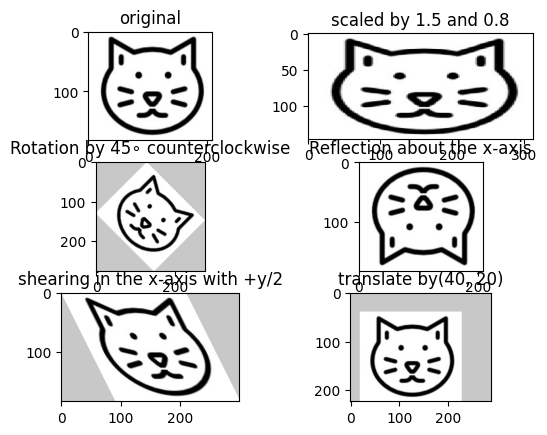

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im
import im

def linear_transformation(src, a): # 선형변환 수행 함수
    M, N, _ = src.shape # M : y축 방향 크기, N : x축 방향 크기
    corners = np.array([[0, 0, N-1, N-1], [0, M-1, 0, M-1]]) # 이미지 코너 위치
    new_points = a.dot(corners).astype(int) # 코너 위치의 선형변환 결과
    xcoord = new_points[0,:] # x축 좌푯값
    ycoord = new_points[1,:] # y축 좌푯값
    minx = np.amin(xcoord)
    maxx = np.amax(xcoord)
    miny = np.amin(ycoord)
    maxy = np.amax(ycoord)

    newN = maxx-minx+1 # 선형변환 후 x축 방향 이미지 크기
    newM = maxy-miny+1 # 선형변환 후 y축 방향 이미지 크기
    dest = np.full((newM, newN, 3), 200) # 출력 이미지 생성
    y = miny
    for i in range(newM):
        x = minx
        for j in range(newN):
            pts = np.array([[x],[y]])
            # 출력 이미지의 (x,y) 위치에 대응하는 원본 이미지의 위치 계산 : 역행렬 사용
            newpts = np.linalg.inv(a).dot(pts).round().astype(int)
            if (newpts[0] >= 0 and newpts[0] < N and newpts[1] >= 0
                and newpts[1] < M):
                dest[i,j,:] = src[newpts[1],newpts[0],:]
            x = x+1
        y = y+1
    return dest

def translate(src, d): # d[0]: x축 이동, d[1]: y축 이동
    M, N, _ = src.shape # N : x축, M : y축
    steps = np.absolute(d)
    
    newM = M + 2*steps[1]
    newN = N + 2*steps[0]
    dest = np.full((newM, newN, 3), 200) # 출력 이미지 생성
    for i in range(newM):
        for j in range(newN):
            yp = i-d[0]
            xp = j-d[1]
            if xp >= 0 and xp < N and yp >= 0 and yp < M:
                dest[i,j,:] = src[yp, xp, :]
    return dest

src = im.imread('Cat.jpg') # 이미지 파일 읽기
plt.subplot(3,2,1) # 3행 2열로 분할하여 첫 번째 위치 선택
plt.title('original') # 제목 출력
plt.imshow(src) # 이미지 출력

# x축 방향으로 1.5배 확대, y축 방향으로 0.8배 축소
a = np.array([[1.5, 0],[0, 0.8]])
dst = linear_transformation(src, a)
plt.subplot(3,2,2)
plt.title('scaled by 1.5 and 0.8')
plt.imshow(dst)

# 반시계방향으로 45° 회전
alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
dst = linear_transformation(src, a)
plt.subplot(3,2,3)
plt.title('Rotation by 45∘ counterclockwise')
plt.imshow(dst)

# x축을 기준으로 반사
a = np.array([[1, 0], [0, -1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,4)
plt.title('Reflection about the x-axis')
plt.imshow(dst)
# x축 방향으로 +y/2만큼 층밀림
a = np.array([[1, .5], [0, 1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,5)
plt.title('shearing in the x-axis with +y/2')
plt.imshow(dst)

# x축 방향으로 40, y축 방향으로 20만큼 평행이동
dst = translate(src, [40, 20])
plt.subplot(3,2,6)
plt.title('translate by(40, 20)')
plt.imshow(dst)
plt.show() # 화면에 보이기


## 7.2 다음 행렬 $A$, $B$, $C$, $C^T$ 의 계수를 구하라

In [8]:
import numpy as np

# 행렬 A를 출력하는 함수
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
        print(line)
    print("")
    
A = np.eye(4)
pprint("A", A)
print("rank(A) =", np.linalg.matrix_rank(A)) # 행렬 A의 계수 계산

B = np.zeros((3,3))
pprint("B", B)
print("rank(B) =", np.linalg.matrix_rank(B)) # 행렬 B의 계수 계산

C = np.array([[2, 5, -3, -4, 8],
              [4, 7, -4, -3, 9],
              [6, 9, -5, 2, 4],
              [0, -9, 6, 5, -6]]);
pprint("C", C)
print("rank(C) =", np.linalg.matrix_rank(C)) # 행렬 C의 계수 계산

CT = np.transpose(C)
pprint("C^T", CT)
print("rank(C^T) =", np.linalg.matrix_rank(CT)) # 행렬 C^T의 계수 계산


--- A ---
1.00	0.00	0.00	0.00	
0.00	1.00	0.00	0.00	
0.00	0.00	1.00	0.00	
0.00	0.00	0.00	1.00	

rank(A) = 4
--- B ---
0.00	0.00	0.00	
0.00	0.00	0.00	
0.00	0.00	0.00	

rank(B) = 0
--- C ---
2.00	5.00	-3.00	-4.00	8.00	
4.00	7.00	-4.00	-3.00	9.00	
6.00	9.00	-5.00	2.00	4.00	
0.00	-9.00	6.00	5.00	-6.00	

rank(C) = 3
--- C^T ---
2.00	4.00	6.00	0.00	
5.00	7.00	9.00	-9.00	
-3.00	-4.00	-5.00	6.00	
-4.00	-3.00	2.00	5.00	
8.00	9.00	4.00	-6.00	

rank(C^T) = 3


# 8장

## 8.1 다음 행렬 A와 B의 고윳값과 고유벡터를 출력하라.

In [9]:
import numpy as np

A = np.array([[2, 3], [3, -6]])
w1, V1 = np.linalg.eig(A) # A의 고윳값과 고유벡터 계산

print("A의 고윳값 = ", w1)
print("A의 고유벡터 = ", V1)

B = np.array([[5,2,0], [2,5,0], [-3,4,6]])
w2, V2 = np.linalg.eig(B) # B의 고윳값과 고유벡터 계산

print("\nB의 고윳값 = ", w2)
print("B의 고유벡터 = ", V2)


A의 고윳값 =  [ 3. -7.]
A의 고유벡터 =  [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]

B의 고윳값 =  [6. 7. 3.]
B의 고유벡터 =  [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


## 8.2 `https://archive.ics.uci.edu/ml/machine—learning—databases/iris/iris.data`에서 4차원 데이터인 "붓꽃" 데이터를 읽고, 주성분 분석(PCA)을 적용하여 2차원 데이터로 차원 축소를 한 결과를 출력하라

C:\Users\sigma\AppData\Local\Temp\ipykernel_24292\605401870.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Iris data set : 150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed records
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777        

C:\Users\sigma\AppData\Local\Temp\ipykernel_24292\605401870.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


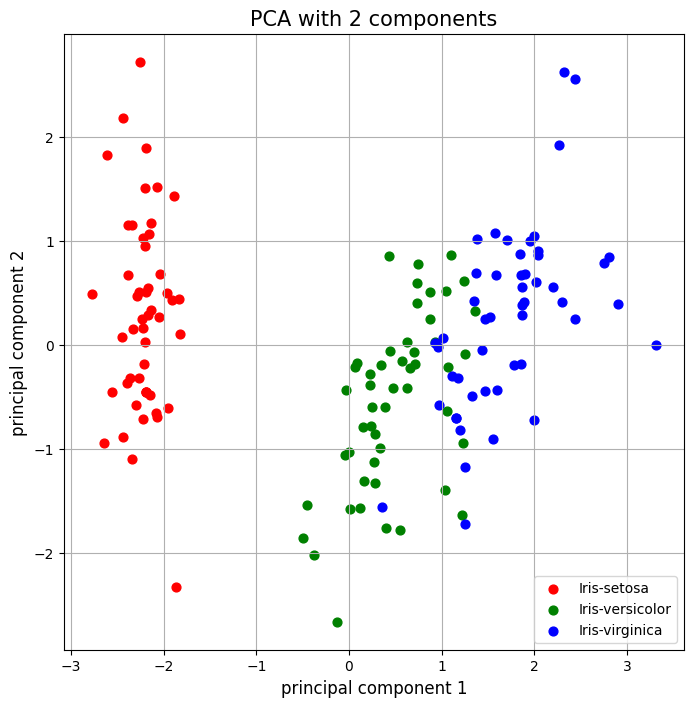

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# iris 데이터의 위치 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Pandas DataFrame으로 읽어들이기
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

nrow, ncol = df.shape
print("Iris data set :", nrow, "records with", ncol, "attributes\n")
print("First 5 records in iris data\n", df.head(5))
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 데이터의 속성값
y = df.loc[:,['target']].values # 데이터의 부류
x = StandardScaler().fit_transform(x) # 평균 0, 분산 1인 데이터로 변환

pca = PCA(n_components=2) # PCA를 적용하여 2개의 주성분만 추출
principalComponents = pca.fit_transform(x)
# 주성분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:", pca.components_[0])
print("Second principal axis:", pca.components_[1])

principalDf = pd.DataFrame(data = principalComponents,
              columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print("\nFirst 5 Transformed records\n", finalDf.head(5))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # iris 데이터의 부류 이름
colors = ['r', 'g', 'b'] # 부류별로 지정된 색상
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
      , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 40)
ax.legend(targets)
ax.grid()
fig.show()

# 9장

## 9.1  다음 행렬 A, B, C 에 대하여, 그람-슈미트과정을 통해 직교기저를 구하라. 또한 행렬 C를 QR 분해하라

In [13]:
import numpy as np

# 행렬 A를 출력하는 함수
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
        print(line)
    print("")
    
# A의 열벡터에 대한 단위벡터로 구성된 직교기저를 구하는 그람-슈미트 과정
def gramSchmidt(A):
    basis = []
    for v in A.T:
        w = v - sum(np.dot(v,b)*b for b in basis )
        if (np.abs(w) > 1e-10).any():
            basis.append(w/np.linalg.norm(w))
    return np.array(basis).T

print("그람-슈미트 과정을 이용한 직교기저\n")
A = np.array([[3, 1], [2, 2]])
pprint("열벡터", A)
pprint("직교기저", gramSchmidt(A))

B = np.array([[1, 1, 0], [1, 3, 1], [2, -1, 1]])
pprint("열벡터", B)
pprint("직교기저", gramSchmidt(B))

C = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0], [0, 0, 1]])
pprint("열벡터", C)
pprint("직교기저", gramSchmidt(C))

# QR 분해
print("\nQR 분해\n")
C = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0], [0, 0, 1]])
Q, R = np.linalg.qr(C)

pprint("C", C)
pprint("Q", Q)
pprint("R", R)
pprint("Q*R", np.matmul(Q,R))


그람-슈미트 과정을 이용한 직교기저

--- 열벡터 ---
3.00	1.00	
2.00	2.00	

--- 직교기저 ---
0.83	-0.55	
0.55	0.83	

--- 열벡터 ---
1.00	1.00	0.00	
1.00	3.00	1.00	
2.00	-1.00	1.00	

--- 직교기저 ---
0.41	0.21	-0.89	
0.41	0.83	0.38	
0.82	-0.52	0.25	

--- 열벡터 ---
1.00	1.00	1.00	
2.00	2.00	0.00	
3.00	0.00	0.00	
0.00	0.00	1.00	

--- 직교기저 ---
0.27	0.36	0.60	
0.53	0.72	-0.30	
0.80	-0.60	-0.00	
0.00	0.00	0.75	


QR 분해

--- C ---
1.00	1.00	1.00	
2.00	2.00	0.00	
3.00	0.00	0.00	
0.00	0.00	1.00	

--- Q ---
-0.27	-0.36	0.60	
-0.53	-0.72	-0.30	
-0.80	0.60	0.00	
-0.00	-0.00	0.75	

--- R ---
-3.74	-1.34	-0.27	
0.00	-1.79	-0.36	
0.00	0.00	1.34	

--- Q*R ---
1.00	1.00	1.00	
2.00	2.00	-0.00	
3.00	-0.00	0.00	
0.00	0.00	1.00	



## 9.2 무어-펜로즈 의사 역행렬을 이용하여 행렬방정식 Ax=b의 해를 구하고, QR 분해를 이용하여 행렬방정식 Cx = d 의 해를 구하라.

In [14]:
import numpy as np

# 행렬 A를 출력하는 함수
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
        print(line)
    print("")
    
# 최적근사해
print("\n행렬방정식의 최적근사해\n")
A = np.array([[1,1], [2,1], [3,1], [4,1]])
b = np.array([[3.5], [4.3], [7.2], [8.0]])
x = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T), b)

pprint("Ax = b의 A", A)
pprint("Ax = b의 b", b)
pprint("Ax = b의 해(x))", x)

print("\nQR 분해를 이용한 행렬방정식의 최적근사해\n")
C = np.array([[1,3,5], [1,1,0], [1,1,2], [1,3,3]])
d = np.array([[3], [5], [7], [-3]])
Q, R = np.linalg.qr(C)
x = np.matmul(np.matmul(np.linalg.inv(R), Q.T), d)

pprint("Cx = d의 C", C)
pprint("Cx = d의 d", d)
pprint("Cx = d의 해(x))", x)



행렬방정식의 최적근사해

--- Ax = b의 A ---
1.00	1.00	
2.00	1.00	
3.00	1.00	
4.00	1.00	

--- Ax = b의 b ---
3.50	
4.30	
7.20	
8.00	

--- Ax = b의 해(x)) ---
1.64	
1.65	


QR 분해를 이용한 행렬방정식의 최적근사해

--- Cx = d의 C ---
1.00	3.00	5.00	
1.00	1.00	0.00	
1.00	1.00	2.00	
1.00	3.00	3.00	

--- Cx = d의 d ---
3.00	
5.00	
7.00	
-3.00	

--- Cx = d의 해(x)) ---
10.00	
-6.00	
2.00	



## 9.3 다음 벡터 d 를 이산 푸리에 변환한 다음, 다시 역 이산 푸리에 변환하라

In [15]:
import numpy as np

def DFT(x): # 이산 푸리에 변환
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def IDFT(x): # 역 이산 푸리에 변환
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)/N
    return np.dot(M, x)

d = np.array([1, 0, 2, 1])
F = DFT(d)
print('이산 푸리에 변환 결과 : ', F)
D = IDFT(F)
print('역 이산 푸리에 변환 결과: ', D)


이산 푸리에 변환 결과 :  [ 4.+0.0000000e+00j -1.+1.0000000e+00j  2.+1.2246468e-16j
 -1.-1.0000000e+00j]
역 이산 푸리에 변환 결과:  [ 1.00000000e+00-1.91428435e-16j -1.11022302e-16-1.02440519e-16j
  2.00000000e+00+7.73141507e-18j  1.00000000e+00+1.63672859e-16j]


# 10장

## 10.1 다음 행렬 A와 B 를 고윳값 분해하는 코드를 작성하라.

In [16]:
import numpy as np

# 행렬 A를 출력하는 함수
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
        print(line)
    print("")
    
print("고윳값 분해\n")
A = np.array([[3.0, 1.0], [2.0, 2.0]])
w, S = np.linalg.eig(A)
L = np.diag(w)
pprint("행렬 A", A)
pprint("고윳값 행렬 L", L)
pprint("고유벡터 행렬 S", S)
pprint("S*L*S^{-1}", np.matmul(np.matmul(S,L), np.linalg.inv(S)))

B = np.array([[1.0, 1.0, 0.0], [1.0, 3.0, 1.0], [2.0, -1.0, 1.0]])
w, S = np.linalg.eig(B)
L = np.diag(w)
pprint("행렬 B", B)
pprint("고윳값 행렬 L", L)
pprint("고유벡터 행렬 S", S)
pprint("S*L*S^{-1}", np.matmul(np.matmul(S,L), np.linalg.inv(S)))


고윳값 분해

--- 행렬 A ---
3.00	1.00	
2.00	2.00	

--- 고윳값 행렬 L ---
4.00	0.00	
0.00	1.00	

--- 고유벡터 행렬 S ---
0.71	-0.45	
0.71	0.89	

--- S*L*S^{-1} ---
3.00	1.00	
2.00	2.00	

--- 행렬 B ---
1.00	1.00	0.00	
1.00	3.00	1.00	
2.00	-1.00	1.00	

--- 고윳값 행렬 L ---
3.36+0.00j	0.00+0.00j	0.00+0.00j	
0.00+0.00j	0.82+0.90j	0.00+0.00j	
0.00+0.00j	0.00+0.00j	0.82-0.90j	

--- 고유벡터 행렬 S ---
0.39+0.00j	0.19-0.29j	0.19+0.29j	
0.92+0.00j	0.22+0.22j	0.22-0.22j	
-0.06+0.00j	-0.88+0.00j	-0.88-0.00j	

--- S*L*S^{-1} ---
1.00-0.00j	1.00+0.00j	-0.00-0.00j	
1.00+0.00j	3.00-0.00j	1.00-0.00j	
2.00+0.00j	-1.00-0.00j	1.00-0.00j	



## 10.2 다음 부류 G 과 아의 2 차원 데이터에 대해 선형판별분석을 할 때 사용되는 정사영벡터를［예제 10-31］에서 구하였다. 이를 시각화하는 코드를 작성하라

C1의 평균벡터 = [3.  3.6]
C2의 평균벡터 = [8.4 7.6]
C1에 대한 부류 내의 산포 행렬 =  [[ 4.  -2. ]
 [-2.  13.2]]
C2에 대한 부류 내의 산포 행렬 =  [[ 9.2 -0.2]
 [-0.2 13.2]]
C1, C2에 대한 부류 내의 산포 행렬의 합 =  [[13.2 -2.2]
 [-2.2 26.4]]
부류 간의 산포 행렬 =  [[29.16 21.6 ]
 [21.6  16.  ]]
Sw^{-1}*Sb의 고윳값 =  [3.13137004+0.j 0.        +0.j]
LDA 정사영벡터 =  [0.91955932 0.39295122]


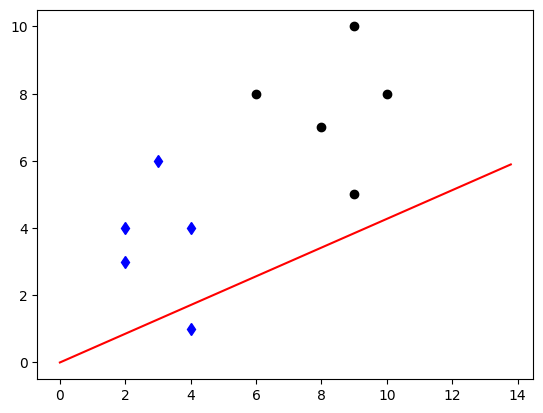

In [17]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from scipy import linalg

C1 = np.array([[2.,3.], [2.,4.], [3.,6.], [4.,1.], [4.,4.]])
C2 = np.array([[6.,8.], [8.,7.], [9.,5.], [9.,10.], [10.,8.]])

mu1 = np.mean(C1, axis=0) # C1의 데이터의 평균벡터 계산
mu2 = np.mean(C2, axis=0) # C2의 데이터의 평균벡터 계산

print("C1의 평균벡터 =", mu1)
print("C2의 평균벡터 =", mu2)

S1 = np.cov(C1.T)*(C1.shape[0]-1)
S2 = np.cov(C2.T)*(C2.shape[0]-1)
Sw = S1 + S2 # C1, C2에 대한 부류 내의 산포 행렬의 합
print("C1에 대한 부류 내의 산포 행렬 = ", S1)
print("C2에 대한 부류 내의 산포 행렬 = ", S2)
print("C1, C2에 대한 부류 내의 산포 행렬의 합 = ", Sw)

Sb = (mu1 - mu2).reshape(2,1).dot((mu1 - mu2).reshape(1,2))
# 부류 간의 산포 행렬 계산
print("부류 간의 산포 행렬 = ", Sb)

D, U = linalg.eig(linalg.inv(Sw).dot(Sb)) # Sw-1Sb의 고윳값 계산
print("Sw^{-1}*Sb의 고윳값 = ", D)
wLDA = U[:,0]
print("LDA 정사영벡터 = ", wLDA)

plt.figure(1)
plt.plot(C1[:,0], C1[:,1], 'bd')
plt.plot(C2[:,0], C2[:,1], 'ko')
plt.plot([0, wLDA[0]*15], [0,wLDA[1]*15], 'r')
plt.show()


# 11장

## 11.1 다음 행렬 A를 특잇값 분해하고, 계수 2 까지만 고려하여 낮은 계수근사하는 코드를 작성하라.

In [18]:
import numpy as np

# 행렬 A를 출력하는 함수
def pprint(msg, A):
    print("---", msg, "---")
    (n,m) = A.shape
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += "{0:.2f}".format(A[i,j]) + "\t"
        print(line)
    print("")
    
print("특잇값 분해\n")
A = np.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
pprint("데이터", A)

U, s, VT = np.linalg.svd(A) # 특잇값 분해
pprint("U", U)

m, n = A.shape
Sigma = np.zeros((m, n)) # mxn 행렬 sigma
k = np.size(s)
Sigma[:k, :k] = np.diag(s) # 특잇값
pprint("Sigma", Sigma)
pprint("V^T", VT) # nxn 행렬 V^T

# 2개의 특잇값 선택
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

# 낮은 계수 근사하여 재구성한 데이터
B = np.matmul(U, np.matmul(Sigma, VT))
pprint("재구성한 데이터", B)


특잇값 분해

--- 데이터 ---
1.00	2.00	3.00	4.00	5.00	6.00	7.00	8.00	9.00	10.00	
11.00	12.00	13.00	14.00	15.00	16.00	17.00	18.00	19.00	20.00	
21.00	22.00	23.00	24.00	25.00	26.00	27.00	28.00	29.00	30.00	

--- U ---
-0.19	0.89	0.41	
-0.51	0.26	-0.82	
-0.84	-0.37	0.41	

--- Sigma ---
96.97	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.00	7.26	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	

--- V^T ---
-0.24	-0.26	-0.27	-0.29	-0.30	-0.32	-0.34	-0.35	-0.37	-0.38	
-0.54	-0.43	-0.32	-0.21	-0.10	0.01	0.12	0.23	0.34	0.44	
-0.43	0.70	-0.11	-0.03	-0.02	-0.41	0.10	0.28	0.13	-0.20	
-0.27	-0.18	-0.11	0.93	-0.07	-0.08	-0.06	-0.05	-0.05	-0.06	
-0.26	-0.13	-0.00	-0.06	0.93	-0.06	-0.09	-0.11	-0.11	-0.10	
-0.32	0.26	-0.23	-0.03	-0.05	0.84	-0.08	-0.06	-0.12	-0.21	
-0.24	-0.12	0.29	-0.05	-0.08	0.01	0.83	-0.25	-0.23	-0.16	
-0.21	-0.22	0.54	-0.05	-0.09	0.08	-0.22	0.65	-0.31	-0.17	
-0.23	-0.05	0.51	-0.03	-0.08	0.05	-0.23	-0.36	0.66	-0.24	
-0.27	0.29	0.33	-0.00	-0.07	-0.03

## 11.2 `flower3.jpg`를 다운받아 소스코드와 동일한 폴더에 저장한다. 영상 파일을 읽어 들여 특잇값 분해를 하고, 고려하는 계수가 1, 5, 20, 30, 50, 100, 150, 200 이 되도록 낮은 계수근사하여 출력하는 코드를 작성하라.

C:\Users\sigma\AppData\Local\Temp\ipykernel_24292\1855585582.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  src = im.imread('flower3.jpg')


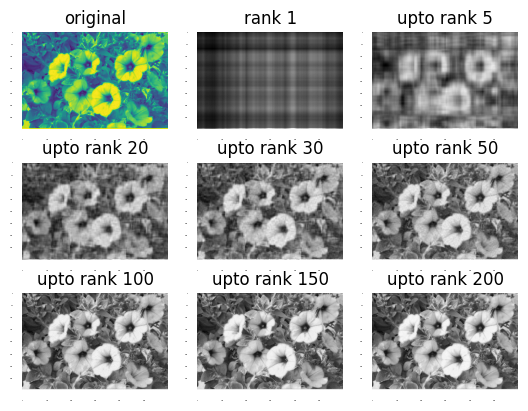

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

src = im.imread('flower3.jpg')
A = src[:,:,0]

# n_elements 개수만큼의 계수에 해당하는 요소를 사용하는 재구성
def reconstruct(U, Sigma, VT, n_elements):
    Sigma = Sigma[:, :n_elements]
    VT = VT[:n_elements, :]
    B = np.matmul(U, np.matmul(Sigma, VT))
    return B

plt.rcParams.update({'xtick.major.width': 0,
                     'xtick.labelsize': 0,
                     'ytick.major.width': 0,
                     'ytick.labelsize': 0,
                     'axes.linewidth': 0})

U, s, VT = np.linalg.svd(A) # 특잇값 분해
m, n = A.shape
Sigma = np.zeros((m, n)) # mxn 행렬 sigma
k = np.size(s)
Sigma[:k, :k] = np.diag(s) # 특잇값

plt.subplot(3,3,1)
plt.title('original')
plt.imshow(A)

plt.subplot(3,3,2)
plt.title('rank 1')
B = reconstruct(U, Sigma, VT, 1)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,3)

plt.title('upto rank 5')
B = reconstruct(U, Sigma, VT, 5)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,4)

plt.title('upto rank 20')
B = reconstruct(U, Sigma, VT, 20)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,5)

plt.title('upto rank 30')
B = reconstruct(U, Sigma, VT, 30)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,6)

plt.title('upto rank 50')
B = reconstruct(U, Sigma, VT, 50)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,7)

plt.title('upto rank 100')
B = reconstruct(U, Sigma, VT, 100)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,8)

plt.title('upto rank 150')
B = reconstruct(U, Sigma, VT, 150)
plt.imshow(B, cmap = 'gray')
plt.subplot(3,3,9)

plt.title('upto rank 200')
B = reconstruct(U, Sigma, VT, 200)
plt.imshow(B, cmap = 'gray')
plt.show()


## 9.3 `cameramanl.png`를 다운받아 소스코드와 동일한 폴더에 저장한다. 영상 파일을 읽어 들여 x에서 x`로 대응하는 호모그래피 변환을 출력하는 코드를 작성하라.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# corners1의 좌표를 corners2의 좌표로 변환하는 호모그래피 행렬 xform 구하기
def compute_xform(corners1, corners2):
    A = [ ]
    for i in range(4):
        x1, y1 = corners1[i]
        x2, y2 = corners2[i]
        A.append([x1, y1, 1, 0, 0, 0, -x2*x1, -x2*y1, -x2])
        A.append([0, 0, 0, x1, y1, 1, -y2*x1, -y2*y1, -y2])

    A = np.asarray(A)
    U, S, V = np.linalg.svd(A)
    xform = V[-1, :]
    xform = np.reshape(xform, (3, 3))

    return xform

def transform_image(xform, image1, corners1, corners2):
    # 호모그래피 행렬 xform을 통한 영상 image1의 변환
    warped = cv2.warpPerspective(image1, xform, (500, 500))

    h1, w1 = image1.shape[:2] # 원본 영상의 높이와 폭
    h2, w2 = warped.shape[:2] # 변환된 영상의 높이와 폭

    out_image = np.zeros((max(h1, h2), w1+w2, 3), dtype=np.uint8)
    out_image[:h1, :w1, :3] = image1
    out_image[:h2, w1:w1+w2, :3] = warped

    for i in range(4): # 대응 위치 표시
        c1 = corners1[i]
        c2 = (corners2[i][0] + w1, corners2[i][1])
        cv2.circle(out_image, c1, radius = 2, color = (0, 255, 0),
                   thickness = 2)
        cv2.circle(out_image, c2, radius = 2, color = (30, 255, 255),
                   thickness = 2)
        cv2.line(out_image, c1, c2, color = (0, 0, 255), thickness = 1)

    cv2.imshow('original and transformed images', out_image)
    cv2.waitKey(0)
        
def main():
    img_path1 = 'cameraman1.png' # 입력 영상 파일명
    img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR) # 영상 파일 읽어들이기
    corners1 = [(122, 51), (26, 300), (454, 131), (330, 414)]
    # 원본 영상의 꼭짓점 위치
    corners2 = [(50, 50), (50, 450), (450, 50), (450, 450)]
    # 변환 영상의 대응 위치
    xform = compute_xform(corners1, corners2) # 변환 행렬 계산
    print(xform) # 호모그래피 행렬 출력
    transform_image(xform, img1, corners1, corners2) # 영상 변환

main()

[[-9.64842123e-03 -3.66657653e-03  9.92332018e-01]
 [ 2.36778020e-03 -1.05518930e-02 -1.22493413e-01]
 [-3.43465862e-06 -2.58271519e-07 -7.00321529e-03]]
